In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pydsm
import math

os.listdir("/media/ayush/DATA1/Hydrophone Recording/")

['.ipynb_checkpoints',
 '0 Degree Horizontal.csv',
 '0 Degree Vertical.csv',
 '11 Degree Horizontal.csv',
 '11 Degree Vertical.csv',
 '30_5_19.csv',
 '45 Degree Horizontal.csv',
 '45 Degree Vertical.csv',
 'Recording 1']

In [2]:
D0H_df = pd.read_csv("/media/ayush/DATA1/Hydrophone Recording/30_5_19.csv")
print("Shape of the recording CSV: " + str(D0H_df.shape))
D0H_df.head()

/home/ayush/Projects/mlpython3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of the recording CSV: (1500003, 8)


,Timestamp,30-05-2019 18:22:24,Timestamp.1,30-05-2019 18:22:24.1,Timestamp.2,30-05-2019 18:22:24.2,Timestamp.3,30-05-2019 18:22:24.3
0,Interval,1E-05,Interval,1E-05,Interval,1E-05,Interval,1E-05
1,Channel name,Input 0,Channel name,Input 1,Channel name,Input 2,Channel name,Input 3
2,Unit,V,Unit,V,Unit,V,Unit,V
3,0,0.00051933900000000061,0,0.0010317860000000007,0,0.001103396,0,0.022934867000000001
4,1E-05,0.00084286500000000167,1E-05,0.00070824200000000042,1E-05,0.00077989900000000002,1E-05,0.022934867000000001


In [3]:
first_channel_rec = D0H_df[['Timestamp','30-05-2019 18:22:24']]
second_channel_rec = D0H_df[['Timestamp.1','30-05-2019 18:22:24.1']]
third_channel_rec = D0H_df[['Timestamp.2','30-05-2019 18:22:24.2']]
fourth_channel_rec = D0H_df[['Timestamp.3','30-05-2019 18:22:24.3']]

time_interval = float(first_channel_rec.iloc[0,1])
sampling_rate = round(1/time_interval)
print("Time interval: " + str(time_interval))
print("Sampling Rate: " + str(sampling_rate))

#Dropping the first two rows and converting to numpy
first_channel_rec = first_channel_rec.iloc[3:].to_numpy().astype(float)
second_channel_rec = second_channel_rec.iloc[3:].to_numpy().astype(float)
third_channel_rec = third_channel_rec.iloc[3:].to_numpy().astype(float)
fourth_channel_rec = fourth_channel_rec.iloc[3:].to_numpy().astype(float)
print("Shapes of individual recordings: " +  str(np.shape(first_channel_rec)))

first_channel_rec

Time interval: 1e-05
Sampling Rate: 100000
Shapes of individual recordings: (1500000, 2)


array([[0.000000e+00, 5.193390e-04],
       [1.000000e-05, 8.428650e-04],
       [2.000000e-05, 8.428650e-04],
       ...,
       [1.499997e+01, 2.460495e-03],
       [1.499998e+01, 2.460495e-03],
       [1.499999e+01, 2.460495e-03]])

In [4]:
def plot_graph(data):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data[:,0], data[:,1])
    #plt.plot(data[24000:30000,0], data[24000:30000,1])

(6000, 2)

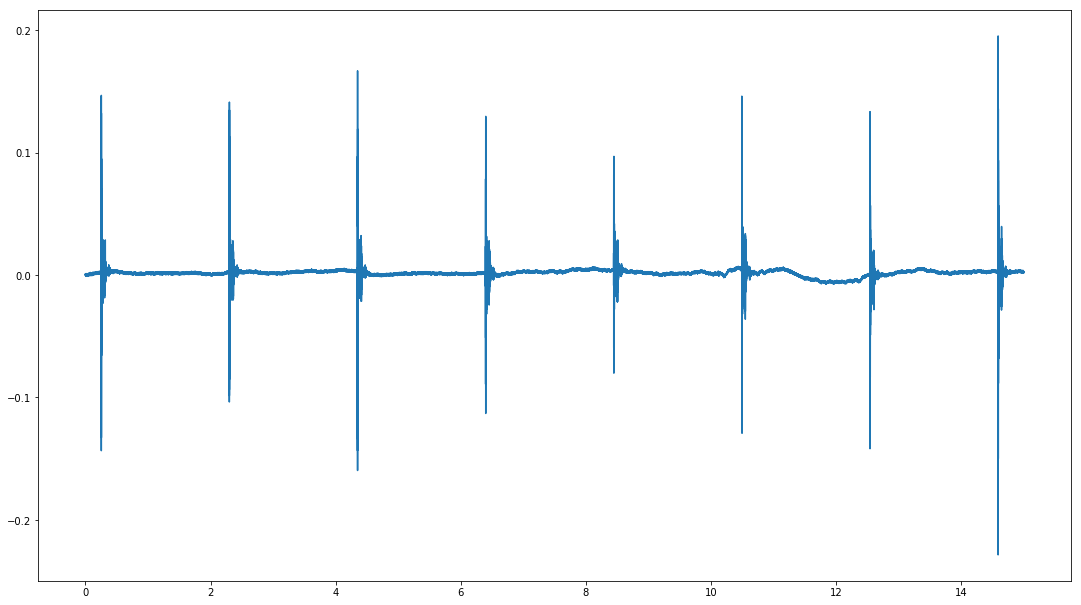

In [5]:
plot_graph(first_channel_rec)
first_channel_rec_cleaned = first_channel_rec[24000:30000,:]
np.shape(first_channel_rec_cleaned)

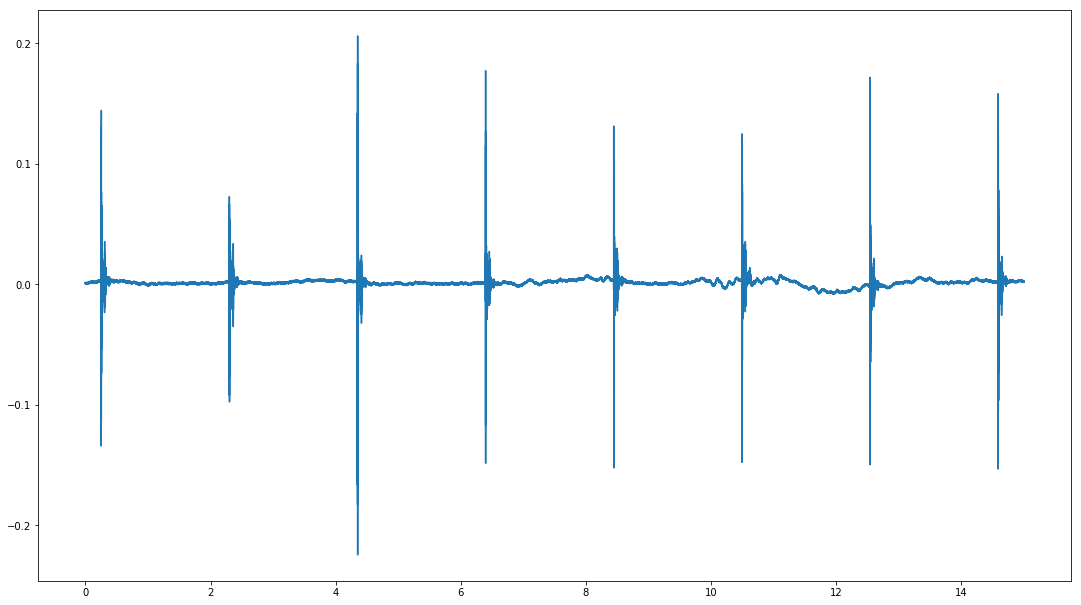

In [6]:
plot_graph(second_channel_rec)

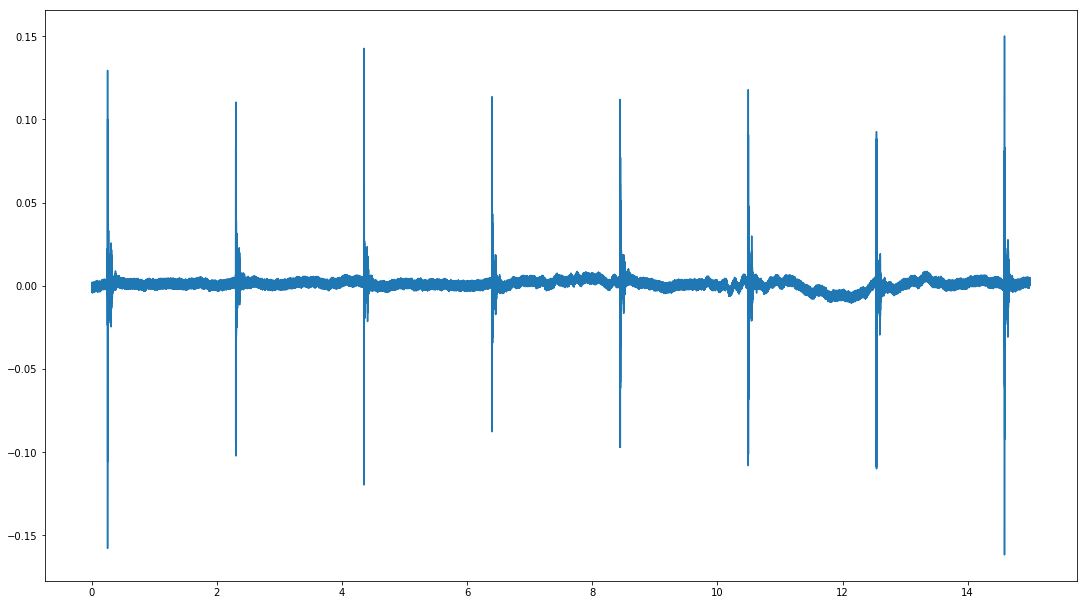

In [7]:
plot_graph(third_channel_rec)

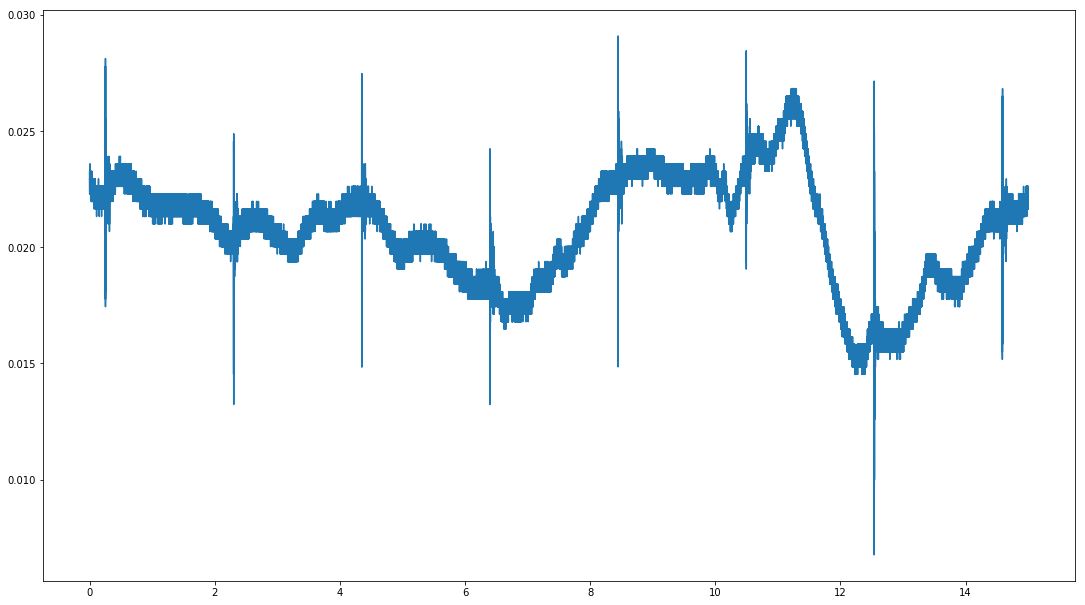

In [8]:
plot_graph(fourth_channel_rec)

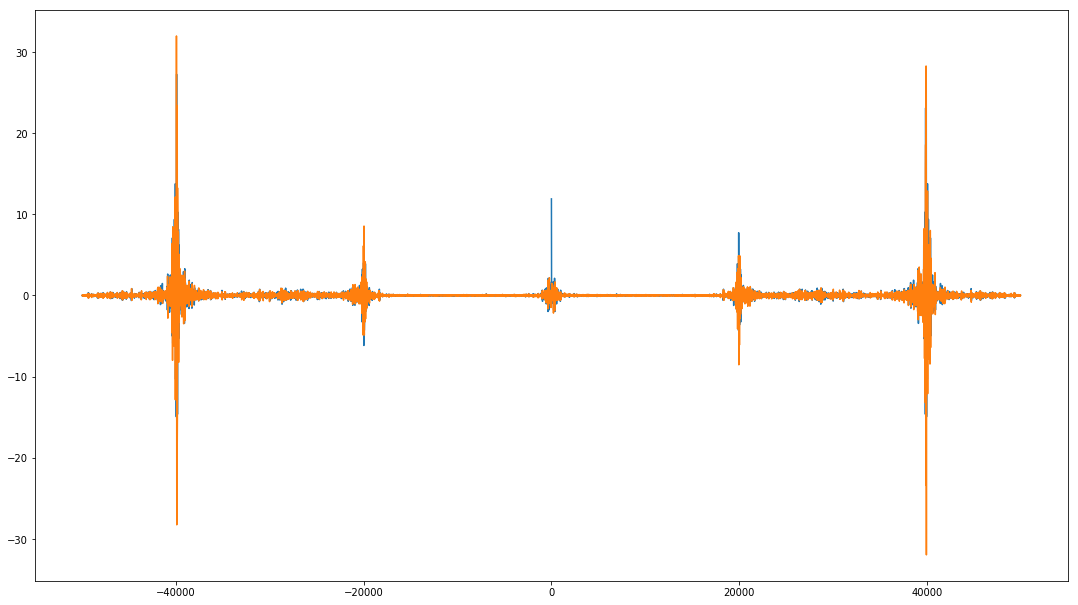

[11.89070617+0.j          0.54678758+0.08907158j  0.3585529 +0.59420217j
 ...  1.2467068 -1.48880154j  0.3585529 -0.59420217j
  0.54678758-0.08907158j]
[  0.          16.66666667  33.33333333 ... -50.         -33.33333333
 -16.66666667]
Shapes of sp: (6000,), freq:(6000,)


In [9]:
sp = np.fft.fft(first_channel_rec_cleaned[:,1])
freq = np.fft.fftfreq(first_channel_rec_cleaned[:,1].shape[-1], d=1e-5)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.plot(freq, sp.real, freq, sp.imag)

plt.show()
print(sp)
print(freq)
print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))

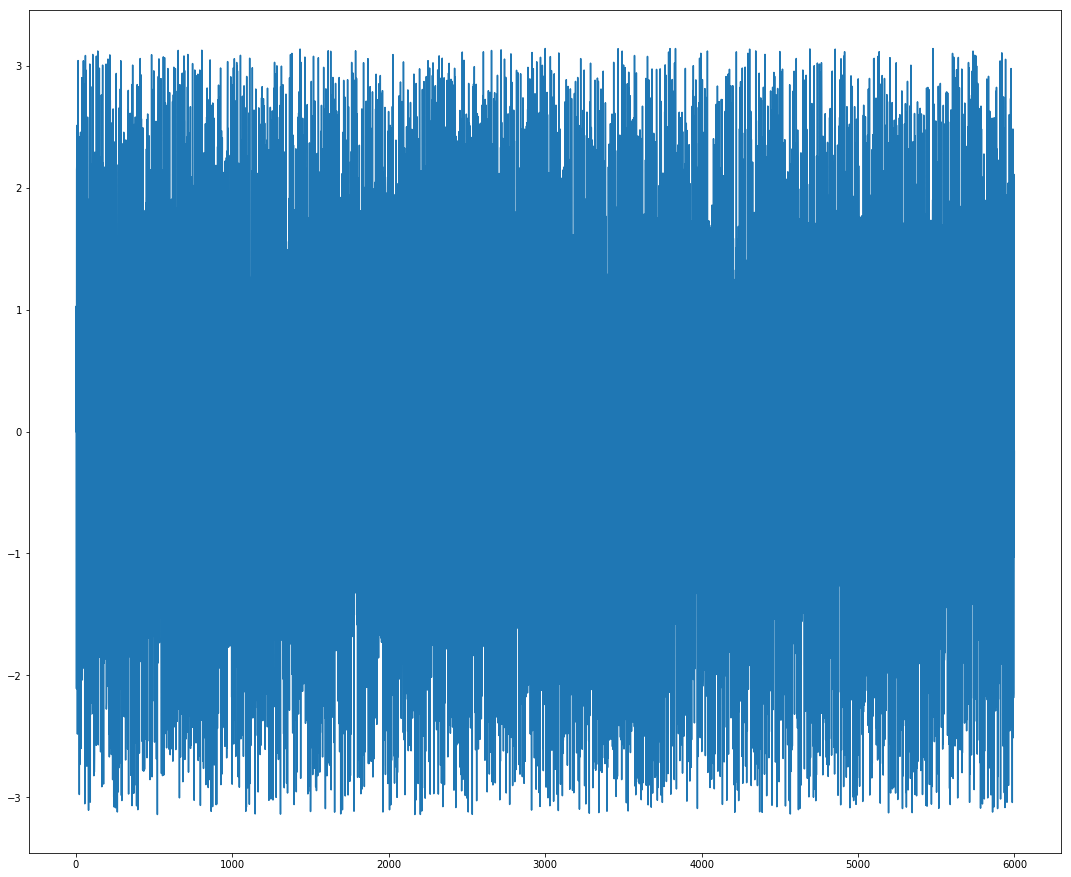

In [55]:
fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(np.angle(sp))

In [11]:
pinger_freq = 20e3
data_point = int(pinger_freq/8)
print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point))
data_pinger_freq = sp[data_point]
print("The fft data at the data_point is: " + str(data_pinger_freq))
phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
print("The phase at the values given is: " + str(phase_info))

The information about 20000.0 is the data_point: 2500
The fft data at the data_point is: (-0.3557478969144017+0.22855283412271374j)
The phase at the values given is: -32.71901321743123


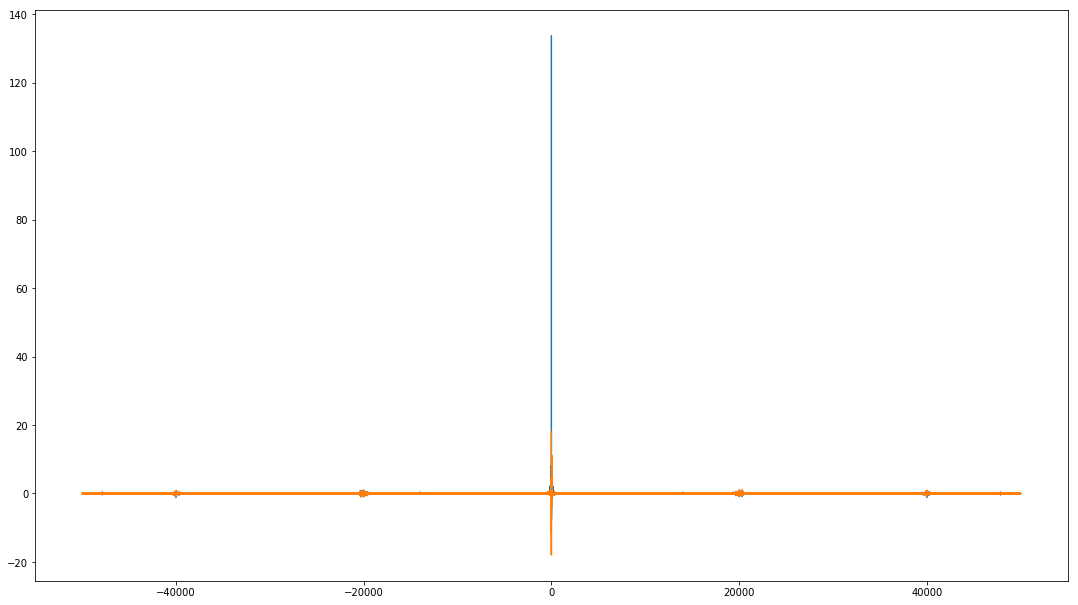

[133.68669998 +0.j          -7.47380266-17.95699486j
   5.12050057 -6.44314609j ...   2.84886544 +6.52237754j
   5.12050057 +6.44314609j  -7.47380266+17.95699486j]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: 44.822961322055995


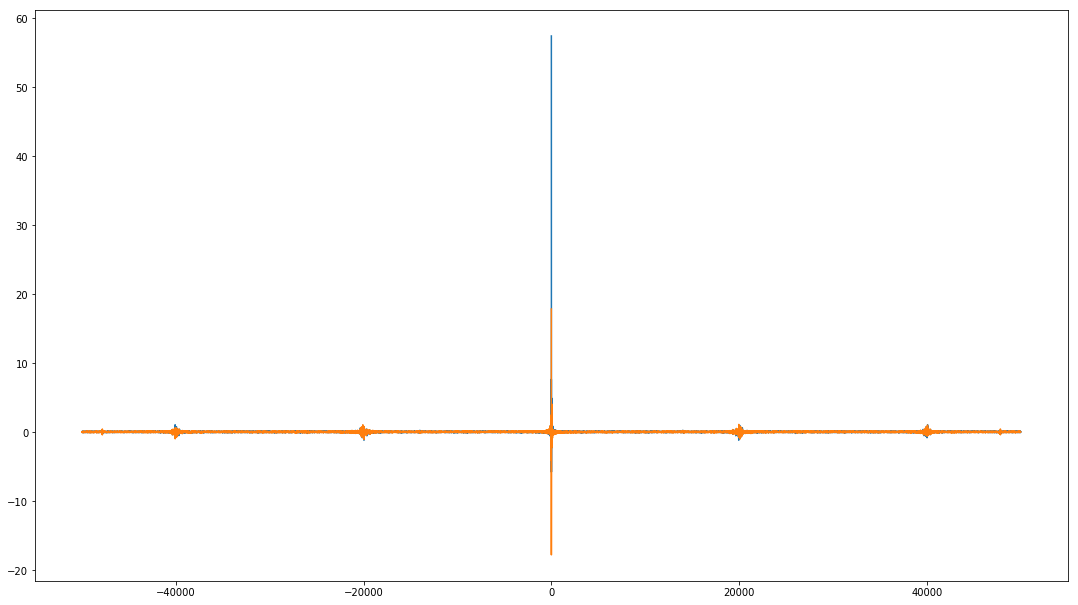

[57.39016222 +0.j         -2.16591256-17.81508202j
  7.6350543  -4.77284871j ...  5.93756532 +6.75294759j
  7.6350543  +4.77284871j -2.16591256+17.81508202j]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: -74.58551537847907


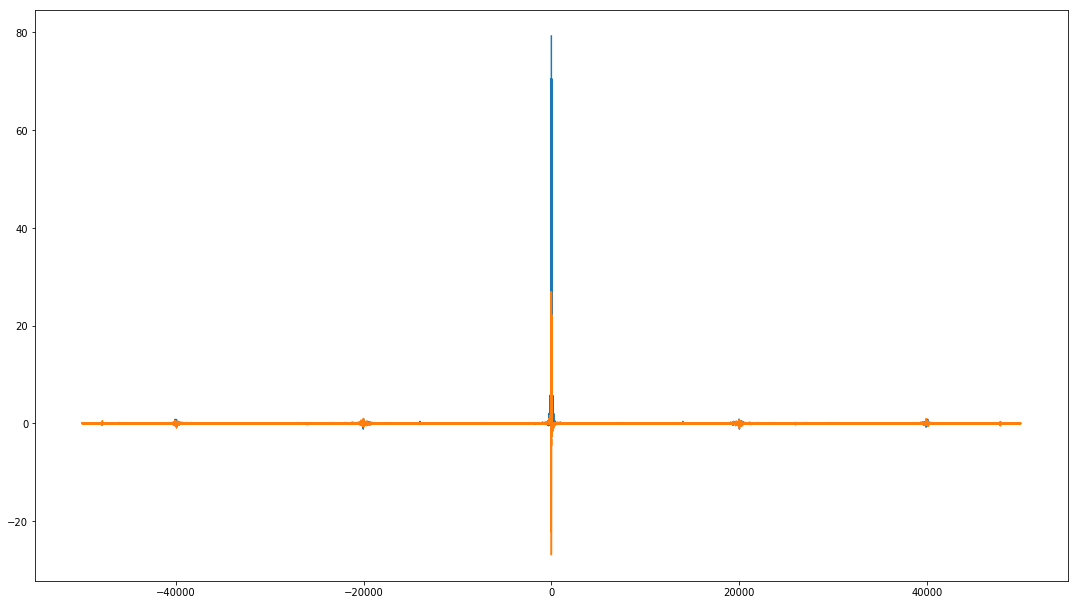

[79.28533169 +0.j         -0.17021043-26.91440826j
  3.06171182 -1.3956064j  ... 11.48389376 +7.52334236j
  3.06171182 +1.3956064j  -0.17021043+26.91440826j]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: -54.87348340363932


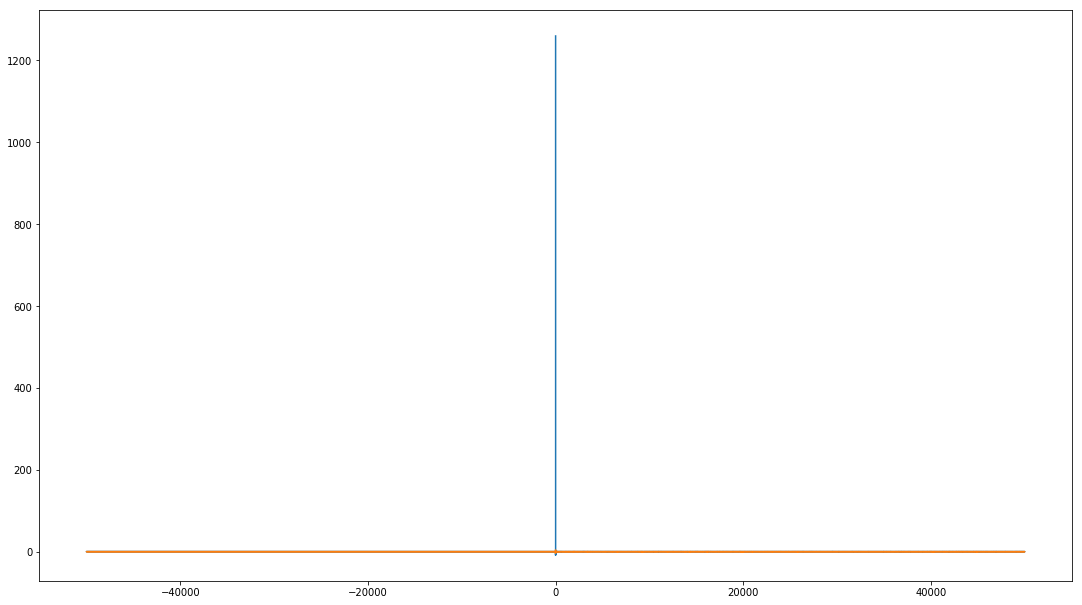

[ 1.25886875e+03+0.j         -7.82924832e+00-3.72943771j
 -5.37529128e-01-1.1506523j  ... -2.99370651e-01+2.21928946j
 -5.37529128e-01+1.1506523j  -7.82924832e+00+3.72943771j]
[ 0.          1.66666667  3.33333333 ... -5.         -3.33333333
 -1.66666667]
Shapes of sp: (60000,), freq:(60000,)
The information about 20000.0 is the data_point: 1200
The fft data at the data_point is: 1999.9999999999998
The phase at the values given is: -1.295796848148091
The three phases are: 44.822961322055995, -74.58551537847907, -54.87348340363932, -1.295796848148091


In [12]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(freq, sp.real, freq, sp.imag)
    plt.show()
    print(sp)
    print(freq)
    print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point))
    data_pinger_freq = freq[data_point]
    print("The fft data at the data_point is: " + str(data_pinger_freq))
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("The phase at the values given is: " + str(phase_info))
    return phase_info


first_phase = give_phase_in_degrees(first_channel_rec, 240000, 300000)
second_phase = give_phase_in_degrees(second_channel_rec, 240000, 300000)
third_phase = give_phase_in_degrees(third_channel_rec, 240000, 300000)
fourth_phase = give_phase_in_degrees(fourth_channel_rec, 240000, 300000)

print("The three phases are: {}, {}, {}, {}".format(first_phase, second_phase, third_phase, fourth_phase))

In [13]:
heading = math.atan((first_phase - third_phase)/(second_phase - third_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

heading = math.atan((first_phase - second_phase)/(third_phase - second_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

heading = math.atan((first_phase - third_phase)/(first_phase - second_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

The heading calculated is: -78.81570423704949
The heading calculated is: 80.62611511380123
The heading calculated is: 39.85915783560037


In [53]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    fig = plt.figure()
    fig.set_size_inches(18.5, 15.5)
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    return phase_info

headings1 = []
headings2 = []
headings3 = []

i = 0
while i < 1400000:
    first_phase = give_phase_in_degrees(first_channel_rec, i, i+200000)
    second_phase = give_phase_in_degrees(second_channel_rec, i, i+200000)
    third_phase = give_phase_in_degrees(third_channel_rec, i, i+200000)
    fourth_phase = give_phase_in_degrees(fourth_channel_rec, i, i+200000)
    print("The time interval is: {} {}".format(i, i+200000))
    heading1 = math.atan((first_phase - third_phase)/(second_phase - third_phase))*180/math.pi
    heading2 = math.atan((first_phase - second_phase)/(third_phase - second_phase))*180/math.pi
    heading3 = math.atan((first_phase - third_phase)/(first_phase - second_phase))*180/math.pi
    headings1.append(heading1)
    headings2.append(heading2)
    headings3.append(heading3)
    print("The heading calculated is: {} {} {}".format(heading1, heading2, heading3))                                              
    print("---------------------------------------------------------------------------------")
    i+=200000

The time interval is: 0 200000
The heading calculated is: 36.46378399553276 14.628764164014644 -70.54624634196148
---------------------------------------------------------------------------------
The time interval is: 200000 400000
The heading calculated is: -85.29878743438498 85.65459597452927 42.73832400179617
---------------------------------------------------------------------------------
The time interval is: 400000 600000
The heading calculated is: -15.512123745351527 51.94805270233815 12.257221082673022
---------------------------------------------------------------------------------
The time interval is: 600000 800000
The heading calculated is: 82.06864906745278 -80.80523147101165 49.28205427813222
---------------------------------------------------------------------------------
The time interval is: 800000 1000000
The heading calculated is: 75.7658917062296 -71.22740088182627 53.26500478539308
---------------------------------------------------------------------------------
Th

/home/ayush/Projects/mlpython3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

<Figure size 1332x1116 with 0 Axes>

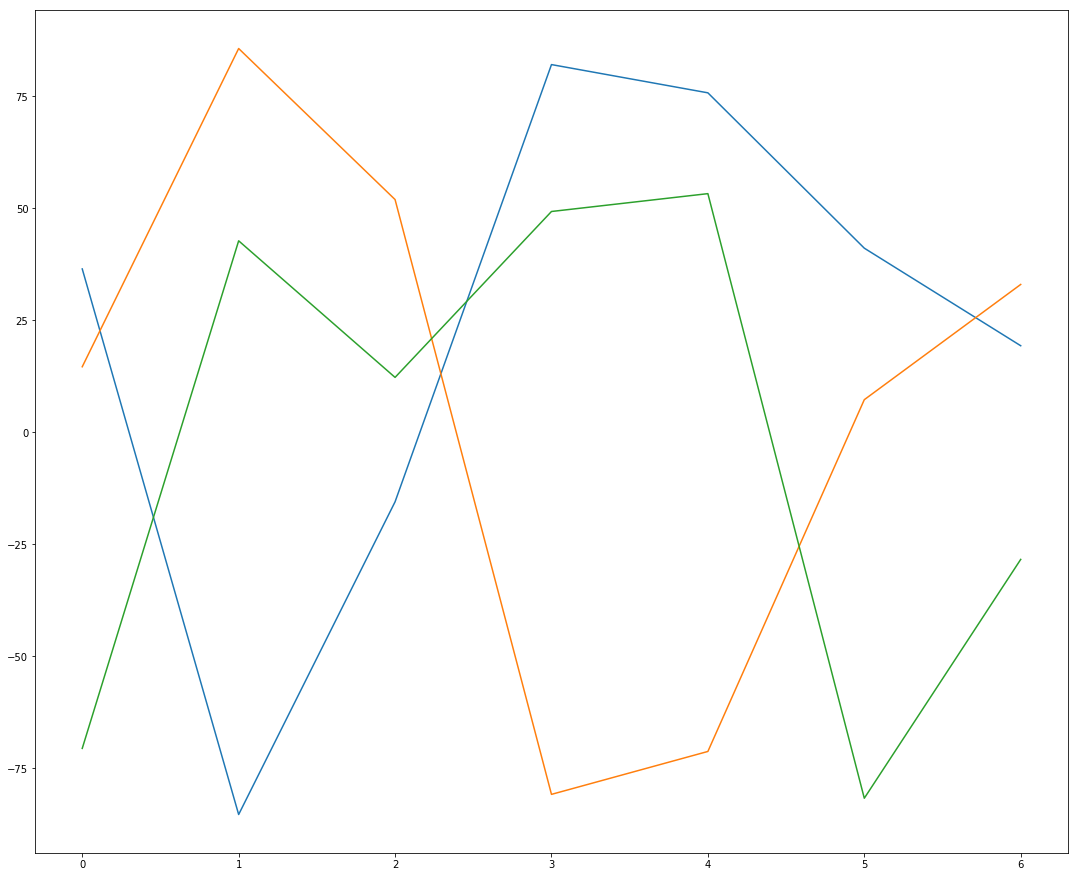

In [54]:
fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(headings1)
plt.plot(headings2)
plt.plot(headings3)

-6498

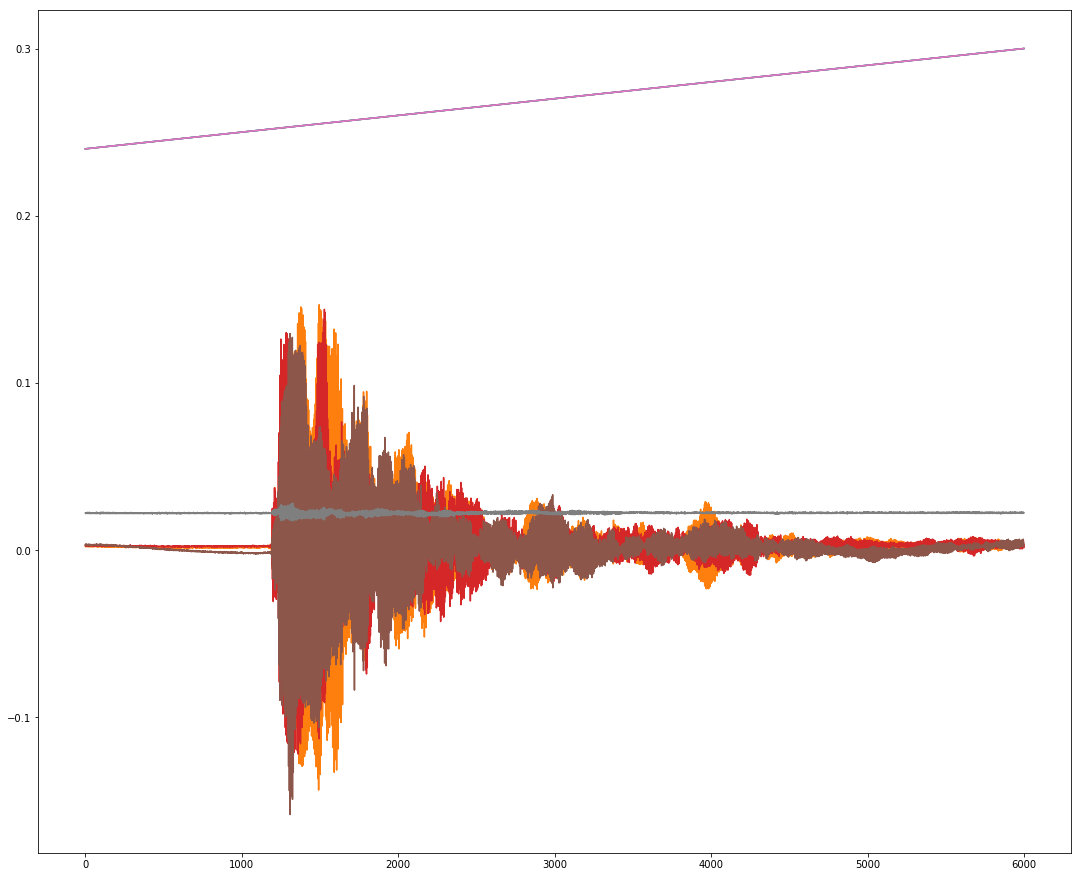

In [17]:
def cross_correlation_using_fft(x, y):
    f1 = np.fft.fft(x)
    
    # flip the signal of y
    f2 = np.fft.fft(np.flipud(y))
    cc = np.real(np.fft.ifft(f1 * f2))

    return np.fft.fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x 
# shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    # we make sure the length of the two signals are the same
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(first_channel_rec[24000:30000,:])
plt.plot(second_channel_rec[24000:30000,:])
plt.plot(third_channel_rec[24000:30000,:])
plt.plot(fourth_channel_rec[24000:30000,:])

compute_shift(first_channel_rec[24000:30000,:], second_channel_rec[24000:30000,:])

Array size: 6000, phase_info: 45.83382786621843, data_point: 120
Array size: 6000, phase_info: 75.29601379909948, data_point: 120
Array size: 6000, phase_info: -51.52510416862104, data_point: 120
Shape of fft array: (6000,)


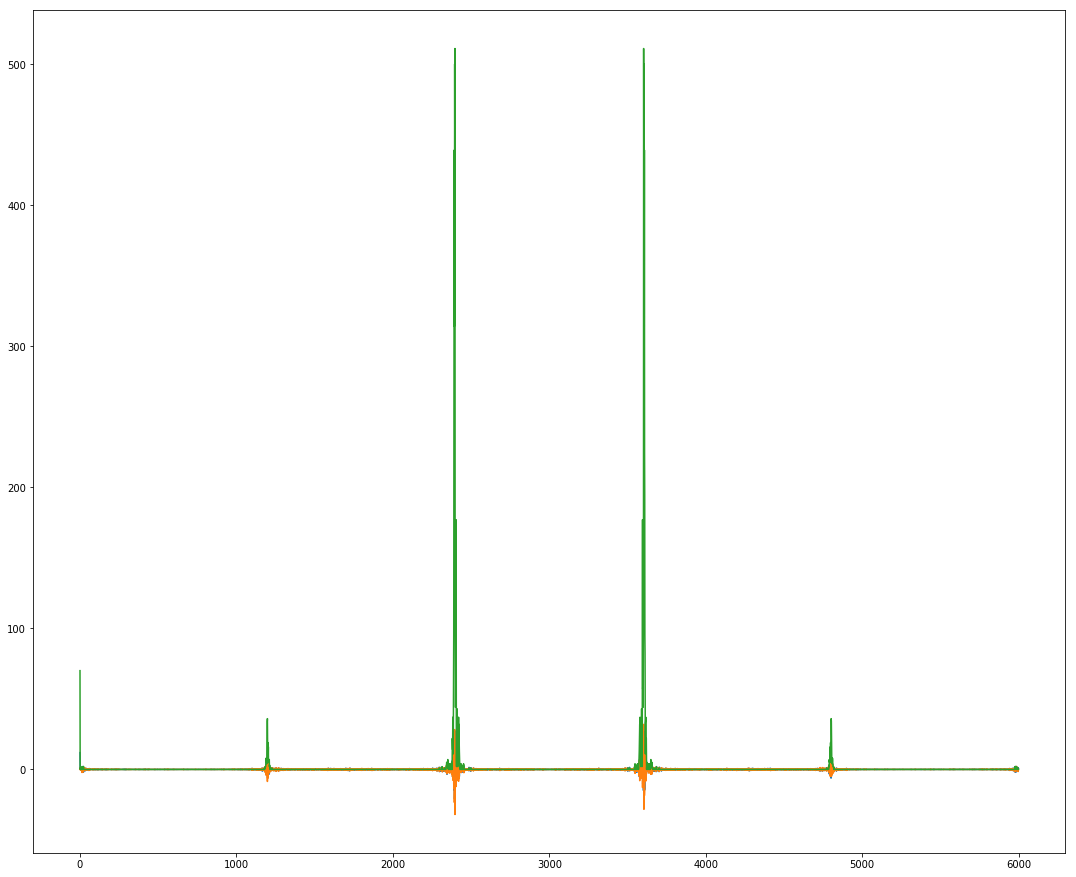

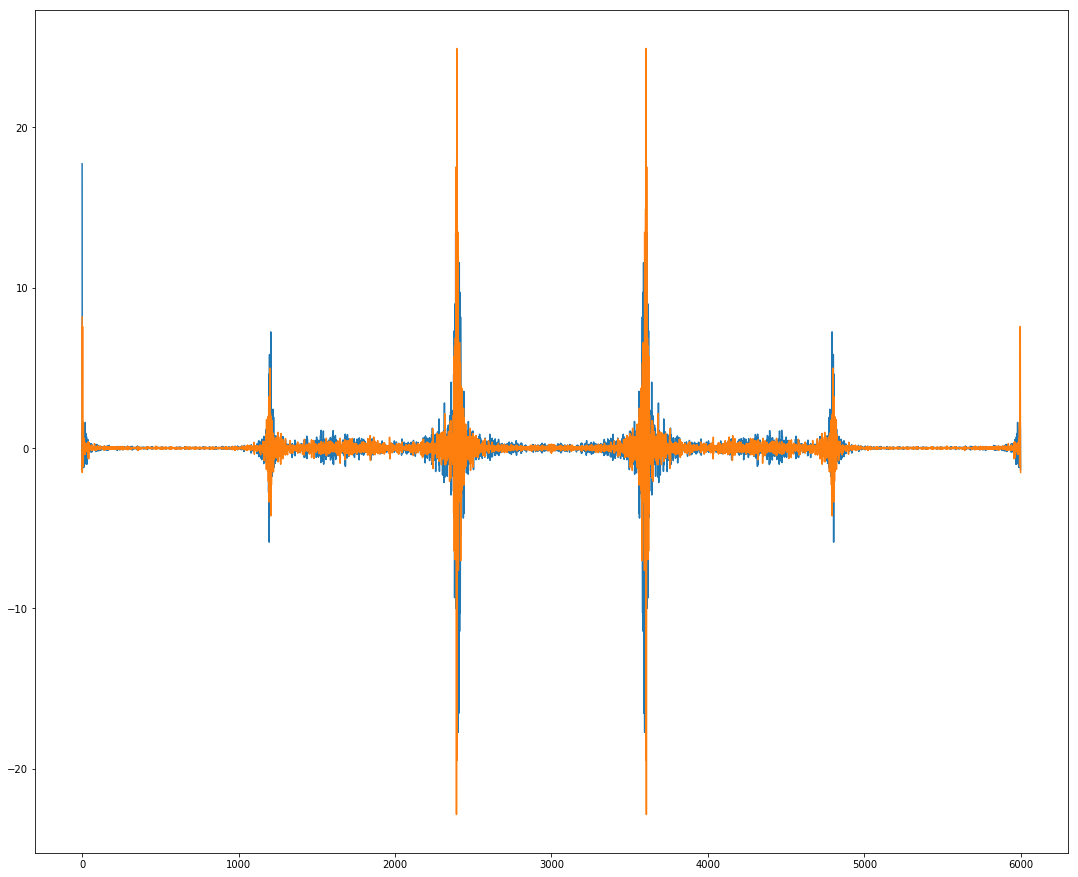

In [51]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("Array size: {}, phase_info: {}, data_point: {}".format(j-i, phase_info, data_point))
    return phase_info, sp, freq

first_phase, first_sp, first_freq = give_phase_in_degrees(first_channel_rec, 24000, 30000)
second_phase, second_sp, second_freq = give_phase_in_degrees(second_channel_rec, 24000, 30000)
third_phase, third_sp, third_freq = give_phase_in_degrees(third_channel_rec, 24000, 30000)

print("Shape of fft array: {}".format(np.shape(first_sp)))

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
#plt.plot(first_freq)
plt.plot(first_sp.real)
plt.plot(first_sp.imag)
#plt.plot(first_freq, first_sp.real)
#plt.plot(first_freq, first_sp.imag)
plt.plot((first_sp.real**2 + first_sp.imag**2)//2)

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(second_sp)
plt.plot(third_sp)


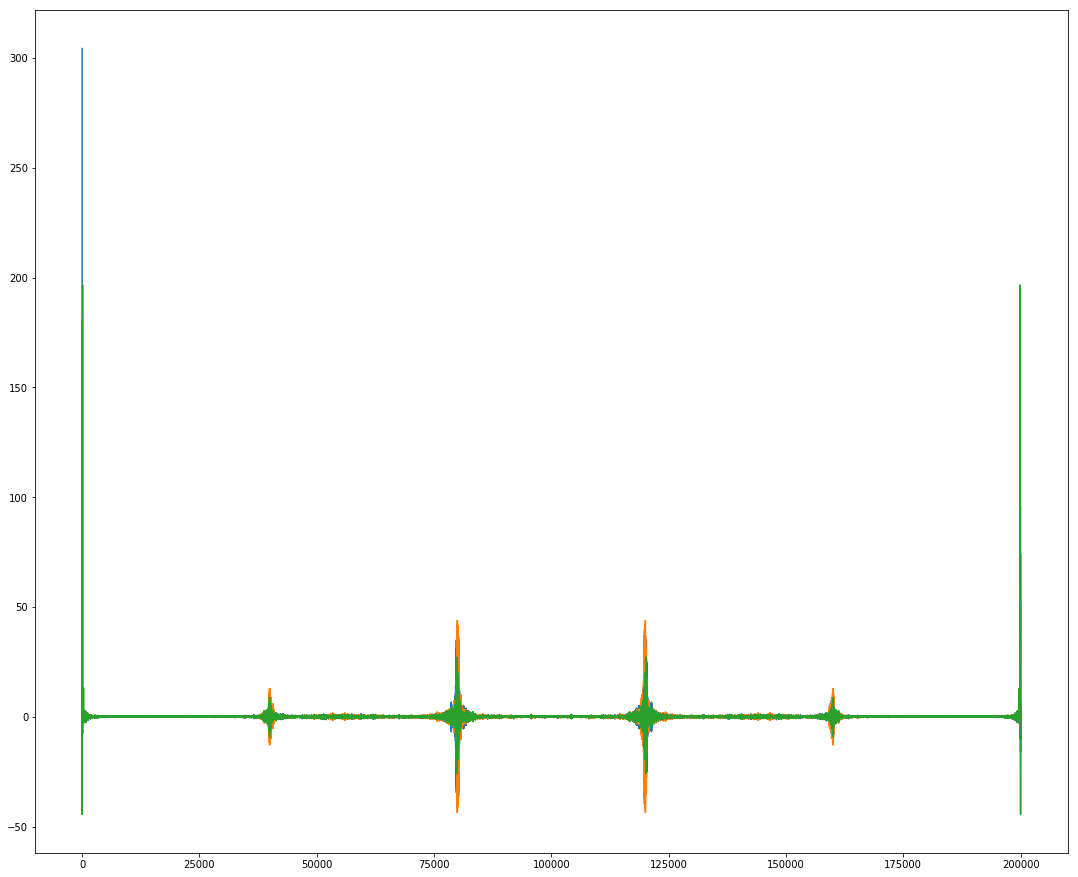

In [23]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    return phase_info, sp

first_phase, first_sp = give_phase_in_degrees(first_channel_rec, 400000, 600000)
second_phase, second_sp = give_phase_in_degrees(second_channel_rec, 400000, 600000)
third_phase, third_sp = give_phase_in_degrees(third_channel_rec, 400000, 600000)

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(first_sp)
plt.plot(second_sp)
plt.plot(third_sp)
